# CS 8770 Project 1

## Part 1

### Load libs

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Function
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics

### Load data

In [9]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_data = datasets.MNIST(
    root="data",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

batch_size = 64

train_dl = DataLoader(train_data, batch_size=batch_size)
test_dl = DataLoader(test_data, batch_size=batch_size)

### Model definitions

In [10]:
class MLP(nn.Module):
    
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x) # 28x28 -> 784
        logits = self.layers(x)
        return logits
    
# class RBF(nn.Module):
    
#     def __init__(self):
#         super(RBF, self).__init__()
        
#     def forward(self, x):
#         pass

# class CNN(nn.Module):
    
#     def __init__(self):
#         super(CNN, self).__init__()
        
#     def forward(self, x):
#         pass

### Train (& validation / test) loops?

In [13]:
from tqdm.notebook import tqdm

def train(model, data, loss_fn, batch_size=64, epochs=5, learning_rate=1e-3):
    for epoch in range(epochs):

        epoch_loss = [] # keep track of our loss?

        # lets grab a bunch of mini-batches from our training data set
        for batch_id, train_params in enumerate(tqdm(data)):

            # samples are our images, labels are their class labels
            samples, labels = train_params

            # we need to convert these into tensors
            samples = samples.type('torch.FloatTensor')
            labels = labels.type('torch.LongTensor')

            # forward pass
            prediction = model(samples)
            loss = loss_fn(prediction, labels)
            
            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # record loss
            epoch_loss.append(loss.item())

        # keep track of loss over our batches
        epoch_loss = statistics.mean(epoch_loss)

### Fit models

In [14]:
# hyperparams
learning_rate = 1e-3

epochs = 5

# instantiate model(s)
model = MLP()

# loss function + optimzation
# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.3)

train(model, train_dl, loss_fn)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

### Results

  0%|          | 0/10000 [00:00<?, ?it/s]

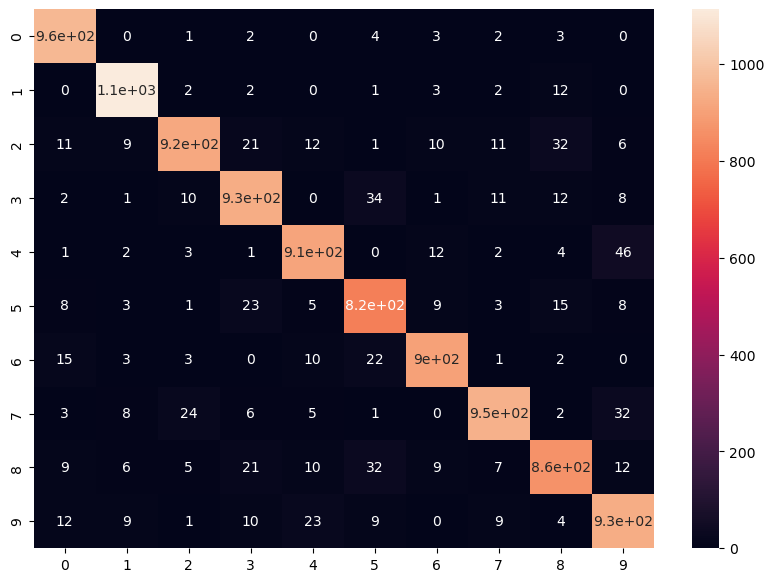

In [15]:
import seaborn as sn
import pandas as pd

# resub because we are loading our MNIST training data set
test_dl_2 = DataLoader(dataset=test_data, shuffle=False, batch_size=1)

# how did we do...
ConfusionMatrix = torch.zeros((10,10))
for sample, label in tqdm(test_dl_2):
    # what is its label?
    label = int(label.numpy())
    #print("Real label is")
    #print(label)
    # convert the sample (image) to a tensor for PyTorch
    sample = sample.type('torch.FloatTensor')
    # do forward pass (i.e., prediction)
    prediction = model(sample) 
    # take the largest output and return integer of which it was (make a classification decision)
    prediction = int(torch.argmax(prediction).numpy())
    # what was our prediction?
    #print(prediction)
    ConfusionMatrix[label,prediction] = ConfusionMatrix[label,prediction] + 1
    
df_cm = pd.DataFrame(np.asarray(ConfusionMatrix), index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()